<a href="https://colab.research.google.com/github/aminsamir45/MIT-9.40-Neural-Computation/blob/main/PSET%204/Samir_Amin_pset4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PSET 4 

# DUE:  March 24, 2023



---

---





# NAME:Samir Amin

# GMAIL: aminsamir45@gmail.com


--------------------------------------------------------------------
--------------------------------------------------------------------


# Learning objectives and outcomes:

This problem set investigates how neurons respond to different stimuli. 

In problem 1, we will analyze real data recorded from an *orientation-selective* neuron in the primary visual cortex. We will plot the cell’s tuning curves as a function of stimulus orientation, see the dynamics of its response over time, and analyze how reliable its response is to multiple repetitions of the same stimulus. 


In problem 2, we will build a **linear-nonlinear model** of the firing rate responses of a synthetic neuron to an auditory stimulus that varies over frequency and time. This model encompasses: a **linear filter** or kernel known as the **spectro-temporal receptive field** (STRF), a thresholding nonlinearity, and a spike generator. We will build all the components of this model and generate a synthetic spike train. Then, we will use the generated spike train to recover the neuron’s receptive field by applying **spike triggered averaging** (STA).

.

.

The expected learning outcomes for this PSET are:


*   Produce raster plots, **peri-stimulus** time histograms and tuning curves.
*   Compute instantaneous firing rates via **convolution**.


*   Write code to simulate a linear nonlinear STRF model and produce visualizations of the different model stages.
*   Write code to compute and visualize the STA.


*   Be able to present your results as a cohesive and well-structured report that gives sound interpretation of your results and observations.

.










# Problem 1: Analyzing spike trains and tuning curves from neurons in the primary visual cortex.


In this exercise, we will analyze spike trains to calculate **tuning curves**. Tuning curves are
useful to understand stimulus preference of a given neuron. The data we will use comes
from Mriganka Sur’s lab at MIT and consists of a single-neuron recording in the cat
primary visual cortex (area V1). The stimulus is a ‘full-field’ one-dimensional sinusoidal
grating that slowly drifts in phase over time. ‘Full-field’ refers to the fact that the stimulus
covers the vast majority of the retinal field of view. (Note: it’s possible to generate these
stimuli in Python, but doing so involves using packages that are outside the scope of this
class. For an example of these stimuli, check out this YouTube video:
https://www.youtube.com/watch?v=N1omYggpq2g) The neuronal data is saved in
the file $dataSur.mat$. Each element of the data matrix (called ‘spikes’) is 0 or 1
representing whether or not the neuron spiked, and the **data matrix has three dimensions** :




> 
*   Dimension 1 represents the 18 different stimulus conditions: 1-16 are different
orientations of the grating, from 0 to 337.5 degrees in 22.5 degree increments.
(17-18 are a blank stimulus with uniform gray screen of the same average
luminance as the grating.)
*   Dimension 2 represents time, sampled at 1 ms. The trial duration is 3500 ms, and
the stimulus is turned on at t = 500 ms and off at t = 2500 ms.


*   Dimension 3 represents trials. In this dataset, there are 30 repetitions (trials) of
each stimulus condition.












We have made a function **raster_plot()** for you that allows you to display a
raster plot showing the responses of the neuron, in all trials for a single stimulus
condition. This function takes four input arguments. The first argument is a 2D data
matrix (each row is a different trial, and each column is a different time bin). The second
argument is the width of each time bin in milliseconds. The last two arguments are the
stimulus onset and offset times, respectively, in milliseconds. This function will plot the
raster and display a red bar representing when the stimulus occurred.

.

$raster\_plot \,\,\, ( \,2d\_matrix(trials, \, time\_bin), width\_of\_time\_bin \,(msec), \, stim\_onset, \, stim\_offset\, )$



In [ ]:
!pip install matplotlib==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.0-cp39-cp39-linux_x86_64.whl size=12056869 sha256=88a7863f19a55315faba482195ea63465afe14d8a153c22dcae8552b8b0f64d6
  Stored in directory: /root/.cache/pip/wheels/f3/94/f6/6ec1de334d7a6dbbad5130e21cccd99176b8a57b44ac7840d6
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.0 which is incompatible.
mizani 0.8.1 requires matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import math
from scipy.stats import multivariate_normal
from matplotlib import cm
from scipy.io import loadmat



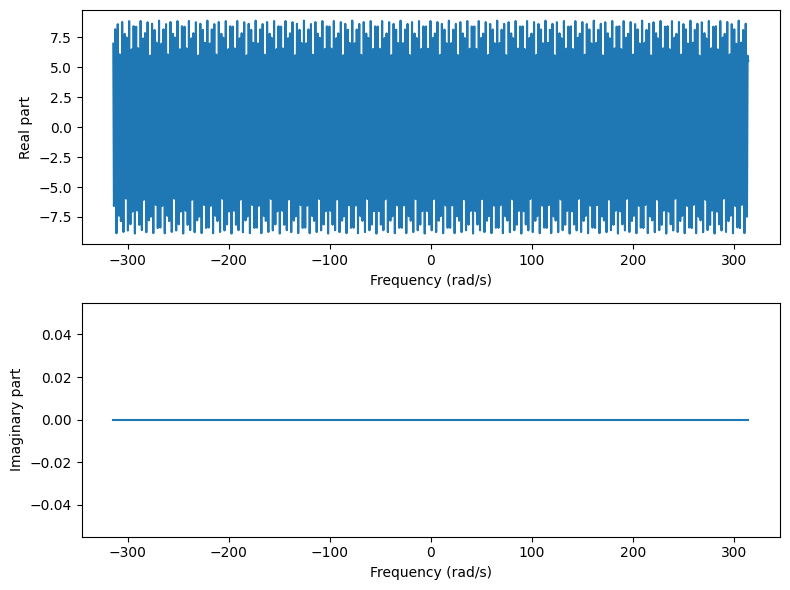

In [ ]:
f0 = 25  # Hz
w0 = 2 * np.pi * f0

def Y(w):
    return np.pi * (np.exp(-1j * w0 * w) + np.exp(1j * w0 * w)) + 1j * np.pi * (np.exp(-1j * w0 * w) - np.exp(1j * w0 * w))

w = np.linspace(-2*w0, 2*w0, 1000)
real_part = np.real(Y(w))
imag_part = np.imag(Y(w))

fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].plot(w, real_part)
axs[0].set_xlabel('Frequency (rad/s)')
axs[0].set_ylabel('Real part')

axs[1].plot(w, imag_part)
axs[1].set_xlabel('Frequency (rad/s)')
axs[1].set_ylabel('Imaginary part')

plt.tight_layout()
plt.show()

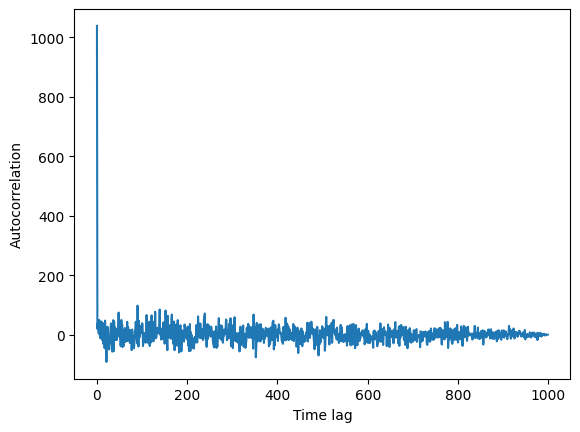

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate white noise signal with zero mean and unit variance
x = np.random.normal(loc=0, scale=1, size=1000)

# Calculate autocorrelation function
acf = np.correlate(x, x, mode='full')
acf = acf[len(acf)//2:]

# Plot autocorrelation function
plt.plot(acf)
plt.xlabel('Time lag')
plt.ylabel('Autocorrelation')
plt.show()

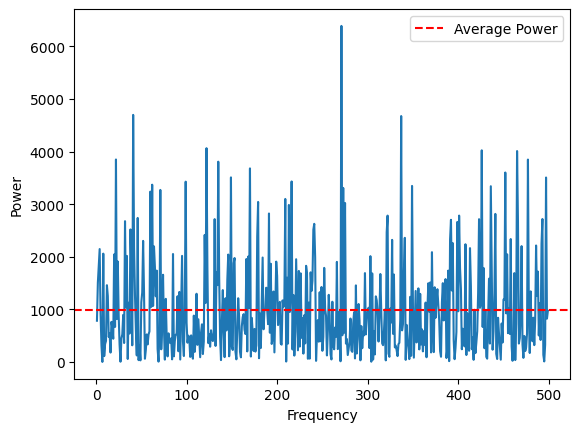

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate white noise signal with zero mean and unit variance
x = np.random.normal(loc=0, scale=1, size=1000)

# Calculate power spectrum
psd = np.abs(np.fft.fft(x))**2
freqs = np.fft.fftfreq(len(x)) * len(x)
mask = freqs > 0

# Average power spectrum
psd_avg = np.mean(psd[mask])

# Plot power spectrum
plt.plot(freqs[mask], psd[mask])
plt.axhline(y=psd_avg, color='r', linestyle='--', label='Average Power')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 1024 is greater than input length  = 1000, using nperseg = 1000
  warnings.warn('nperseg = {0:d} is greater than input length '


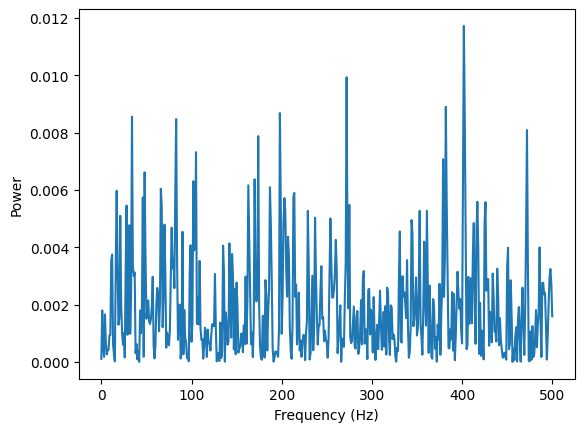

In [ ]:
import numpy as np

# Parameters
fs = 1000     # Sampling frequency
T = 1         # Duration of the signal
N = fs*T      # Number of samples
mean = 0      # Zero mean
variance = 1  # Unit variance

# Generate the white noise signal
x = np.random.normal(mean, np.sqrt(variance), N)

from scipy.signal import gaussian, convolve

# Parameters
fwhm = 0.1      # Full width at half maximum (in seconds)
sigma = fwhm/(2*np.sqrt(2*np.log(2)))  # Standard deviation of the Gaussian pulse
t = np.arange(-5*sigma, 5*sigma, 1/fs)  # Time vector for the Gaussian pulse
gaussian_pulse = gaussian(len(t), std=sigma)  # Generate the Gaussian pulse

# Convolve the white noise signal with the Gaussian pulse
y = convolve(x, gaussian_pulse, mode='same')

from scipy.signal import welch

# Compute the average power spectrum of y(t)
f, P = welch(y, fs=fs, nperseg=1024)

# Plot the average power spectrum of y(t)
import matplotlib.pyplot as plt

plt.plot(f, P)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show()

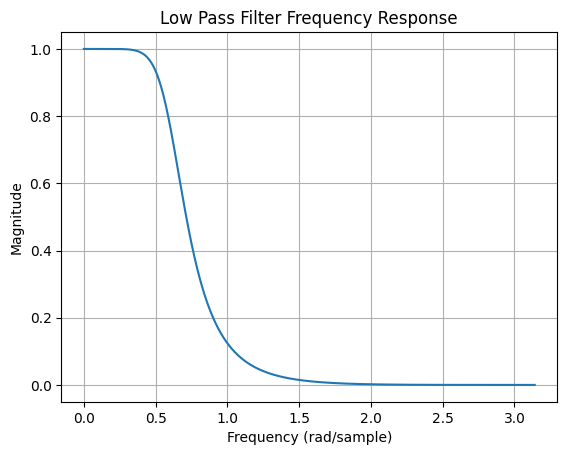

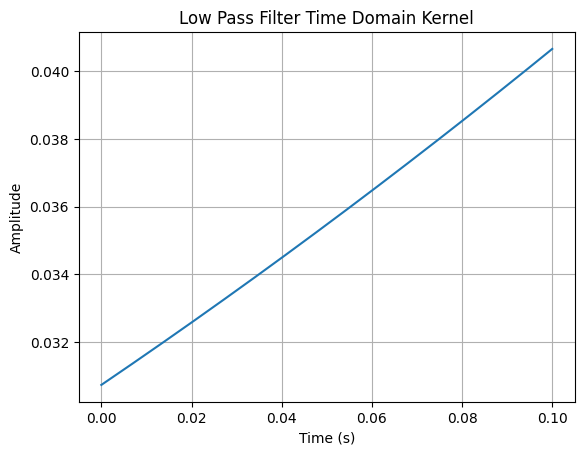

In [ ]:


import matplotlib.pyplot as plt
from scipy import signal

# Define the filter
cutoff_freq = 100  # Hz
filter_order = 4
b, a = signal.butter(filter_order, cutoff_freq, 'low', fs=1000)

# Compute the frequency response
w, h = signal.freqz(b, a, worN=8000)

# Plot the frequency response
plt.figure()
plt.plot(w, np.abs(h))
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.title('Low Pass Filter Frequency Response')
plt.grid()
plt.show()

# Compute and plot the time-domain kernel
t = np.linspace(0, 0.1, 1000)
kernel = signal.impulse((b, a), T=t)[1]
plt.figure()
plt.plot(t, kernel)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Low Pass Filter Time Domain Kernel')
plt.grid()
plt.show()

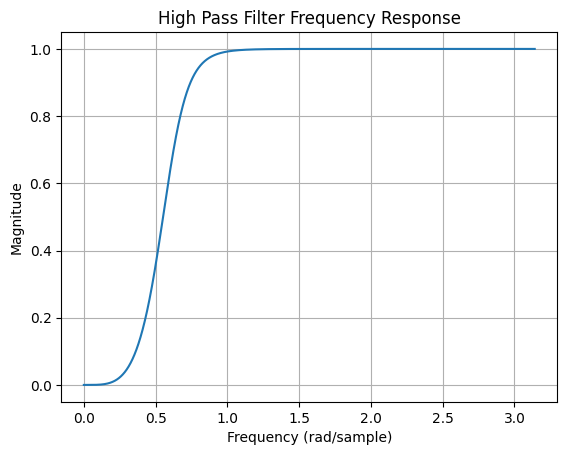

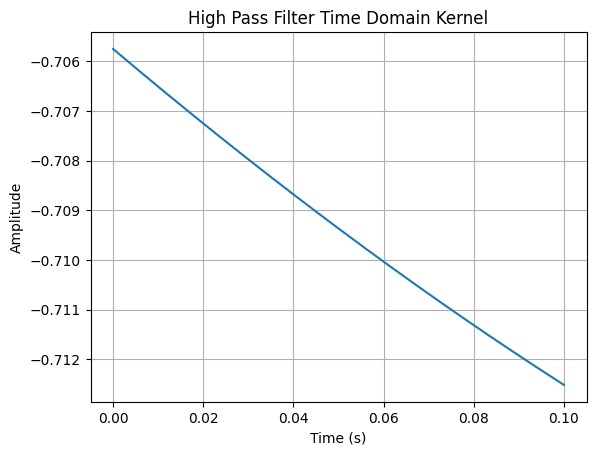

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the filter
cutoff_freq = 100  # Hz
filter_order = 4
b, a = signal.butter(filter_order, cutoff_freq, 'high', fs=1000)

# Compute the frequency response
w, h = signal.freqz(b, a, worN=8000)

# Plot the frequency response
plt.figure()
plt.plot(w, np.abs(h))
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.title('High Pass Filter Frequency Response')
plt.grid()
plt.show()

# Compute and plot the time-domain kernel
t = np.linspace(0, 0.1, 1000)
kernel = signal.impulse((b, a), T=t)[1]
plt.figure()
plt.plot(t, kernel)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('High Pass Filter Time Domain Kernel')
plt.grid()
plt.show()

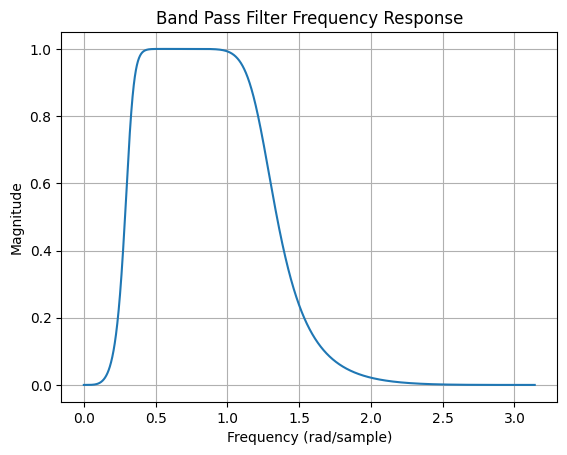

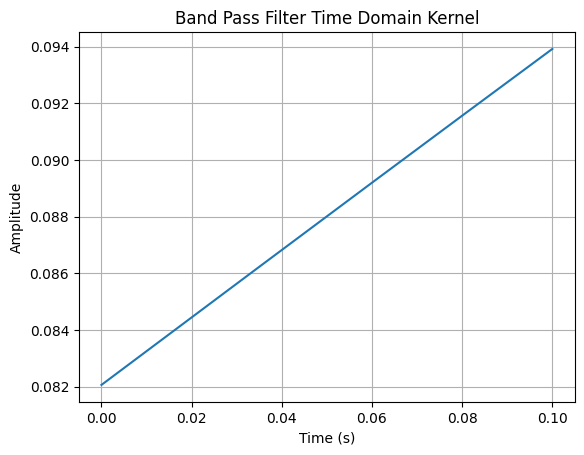

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the filter
low_cutoff = 50  # Hz
high_cutoff = 200  # Hz
filter_order = 4
b, a = signal.butter(filter_order, [low_cutoff, high_cutoff], 'band', fs=1000)

# Compute the frequency response
w, h = signal.freqz(b, a, worN=8000)

# Plot the frequency response
plt.figure()
plt.plot(w, np.abs(h))
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.title('Band Pass Filter Frequency Response')
plt.grid()
plt.show()

# Compute and plot the time-domain kernel
t = np.linspace(0, 0.1, 1000)
kernel = signal.impulse((b, a), T=t)[1]
plt.figure()
plt.plot(t, kernel)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Band Pass Filter Time Domain Kernel')
plt.grid()
plt.show()

In [ ]:
# load data file (as we did in PSET 1)
from google.colab import drive
drive.mount('/content/drive')

data=loadmat('/content/drive/MyDrive/Colab Notebooks/9.40/psets/PSET 4/dataSur.mat')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### raster_plot() function

This function is given to you. Nothing to change.

If you encounter difficulties getting a good quality picture, you can check the Canvas folder where you get this file for good quality pictures with MATLAB.

In [ ]:

# raster_plot() function

def raster_plot(r, dt, t_on, t_off, stim_name):
    # makes raster plot - input must be 2d array (trials x time): r
    trials = r.shape[0]
    intervals = r.shape[1]
    
    
    #spike_times = np.zeros
    
    figR, axR = plt.subplots(figsize=(8,5))
    
    # r entries are 0 and 1
    k = 1
    for idx in np.arange(trials-1, -1, -1):
        j = np.argwhere(r[idx,:])               # choose the 1 entries, i.e., spikes in trial idx
        
        if j.size != 0:
            for t in j:
                x_pos = [(t-0.5)*dt, (t+0.5)*dt]
                y_pos = [k, k+.8]
                axR.plot(x_pos, y_pos, linewidth=1.5)    # colors
        
        k = k + 1         # trial update
    
    
    axR.plot([500, 2500], [trials+1, trials+1], 'r-', linewidth=3.5)  # interval stimulus is ON
    axR.set_title(stim_name)
    axR.set_xlabel('Time (ms)')
    axR.set_ylabel('Trials')
    
    plt.xlim(dt, intervals*dt);
    plt.ylim(1, trials+2);
    plt.show()


In [ ]:
# just checking what is inside data ...
data
# print(data['spikes'])


## 1.1

Make a raster plot for *stimulus #6* (**112.5 degrees orientation**), and describe
what you observe. Does this cell respond to this stimulus orientation?

.


$\Delta \theta = 22.5^o$



.


Hint:

np.squeeze() can be useful to tansform 'spikes' data into a row array.

.

Check documentation for what it does.

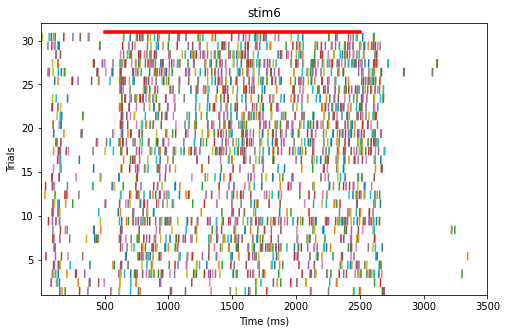

In [ ]:
spikes = data['spikes']                    # variable of interest in data is named 'spikes'

# print("spikes :",spikes.shape)

stim_number = 6 

# prepare your data in the correct shape to plot it and NAME it stim6:
stim6 = np.squeeze(spikes[stim_number-1,:,:]).T



stim_name = 'stim6'

raster_plot(stim6, 1, 500, 2500, stim_name)   # stim6 is your data. Check the function rater_plot() , given above, for more details

Yes, the cell does respond to the stimulus. The number of spikes increases during the time that the stimulus is active.

##1.2

Plot the peri-stimulus time histogram (PSTH) for stimulus #6. Use $10ms$ bins,
and make your y-axis have units of **Hz**.

.


PSTH: recordings of the frining rate from a neuron while being stimulated by some input. This experiment is repeated several times and the results are reported in a histogram with bin witdth $\Delta t$.



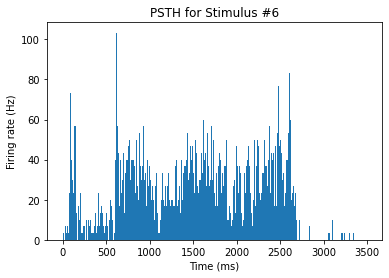

In [ ]:
bin_width = 10  # in milliseconds
avg_spikes = np.mean(stim6, 0)

# calculate number of bins needed based on length of stimulus
n_bins = len(stim6[0]) // bin_width

# create an empty array to hold spike counts per bin
psth = np.zeros(n_bins)

# loop over trials and add up spikes per bin
for i in range(len(stim6)):
    for j in range(n_bins):
        start_idx = j * bin_width
        end_idx = start_idx + bin_width
        psth[j] += np.sum(stim6[i, start_idx:end_idx])

# convert spike counts to firing rates (Hz)
psth = psth / (len(stim6) * bin_width / 1000)

# create x-axis array for time in milliseconds
time_ms = np.arange(n_bins) * bin_width

# plot PSTH with firing rate (Hz) as y-axis and time (ms) as x-axis
fig, ax = plt.subplots()
ax.bar(time_ms, psth, width=bin_width)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Firing rate (Hz)')
ax.set_title('PSTH for Stimulus #6')
plt.show()

##1.3

Compute the instantaneous firing rate for trial $25$ (still **stimulus #6**) by convolving the spike train with a **boxcar** kernel of width $10ms$ (https://en.wikipedia.org/wiki/Boxcar_function). 

.


1. Plot this rate in units of Hz as a function of time. 


2. Briefly comment on how the instantaneous firing rate of a single trial resembles the PSTH you previously calculated. 

3. Discuss possible sources for agreement or disagreement.



**ANSWER:**

. The instantaneous firing rate of a single trial resembles the stimulus turned on at 500ms and off at 2000ms. Also, it is a single trial measurement whereas the PSTH is an average accross all of the single trials conducted. There is more variance in the instantaneous firing rates but that is not captured as the PSTH is the average. 

. This lines up with the data because the firing rate responds to the stimulus during the time period and this is accurately represented in the graph.




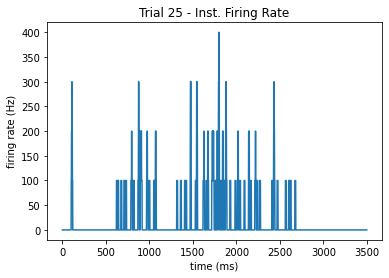

In [ ]:
trial25 = stim6[24,:]    # trial 25

# Define boxcar kernel
fs = 1000  # Sampling rate in Hz
boxcar_width = 10  # in ms
boxcar_size = int(boxcar_width / 1000 * fs)  # Size of boxcar kernel in samples
boxcar_filt = np.ones(boxcar_size) / boxcar_size  # Normalize boxcar kernel

# Compute the convolution in Hz:
inst_firing_rate = np.convolve(trial25, boxcar_filt, mode='same') * fs

# Plot the output of the convolution as a function of time (msec)
fig3, ax3 = plt.subplots();
ax3.plot(np.arange(len(trial25)), inst_firing_rate);
ax3.set(xlabel='time (ms)', ylabel='firing rate (Hz)', title='Trial 25 - Inst. Firing Rate');

##1.4

The **tuning curve** is a compact way to visualize stimulus preference of a cell. To calculate the tuning curve, we proceed as follows: for each stimulus condition (or orientation), we compute the average firing rate in the time window from stimulus onset to stimulus offset. Plot the tuning curve (firing rate as a function of stimulus orientation). Make sure that your y-axis is in units of Hz.



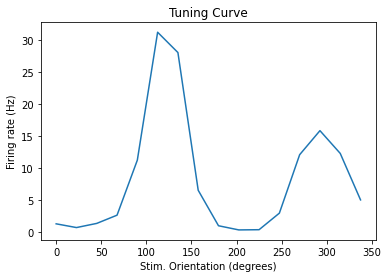

In [ ]:
# you'll need to average over trials and firings over stimulus time
# don't forget to convert time to seconds so rates come out in Hz.

angles = np.arange(0,337.6,22.5)    # given to us
spikes = data['spikes']
num_stim = 16   #number of unique stimuli
num_trials = 30
avg_frs = []

# calculate the rates for when the stimulus is on as a function of the angles
# and plot rates bs angles. For the rates you need to include only the first 16 ones,
# we don't care about the background.

for stim in range(num_stim): 
  fr = 0
  stimulus = np.transpose(spikes[stim])
  for trial in range(num_trials): 
    trial_s = stimulus[trial,:]  
    fr += sum(trial_s[500:2500])/2  #get firing rate divided by 2 seconds
  fr = fr/num_trials
  avg_frs.append(fr)


fig4, ax4 = plt.subplots();
ax4.plot(angles, avg_frs)
ax4.set(xlabel='Stim. Orientation (degrees)', ylabel='Firing rate (Hz)', title
='Tuning Curve');
plt.show()


##1.5


To which grating orientation is this cell most responsive? What is the significance of the second peak in the tuning curve?


.

You can add a grid to your plot to read any peaks in your plot.


**Answer:**


. The cell is most responsive at an orientation of 112.5 degrees. This is the peak of the tuning curve. The significance of the second peak in the tuning curve at an orientation of 292.5 degrees is that it is exactly 180 degrees after the peak responsiveness of the tuning curve. This indicates that these peaks are the same stimuli moving in opposite directions and that the orientation of the stimuli impacts the firing of the cell.

.



## 1.6

Compute the average firing rate of the cell for stimulus $17$ and $18$ (blank stimulus).


**Answer**


.




In [ ]:
# should follow from similar calculations as in 1.5

# add your code here

stims = [16, 17]
avg_frs = []
for stim in stims:
  fr = 0
  stimulus = np.transpose(spikes[stim])
  for trial in range(num_trials): 
    trial_s = stimulus[trial,:]  
    fr += sum(trial_s[500:2500])/2  #get firing rate divided by 2 seconds
  fr = fr/num_trials
  avg_frs.append(fr)
  print(f'Average firing rate for stimulus {stim}: \t {fr} Hz')

print(f'Average firing rate for stimulus 18 and 17: \t {sum(avg_frs)/2} Hz')



Average firing rate for stimulus 16: 	 3.15 Hz
Average firing rate for stimulus 17: 	 3.2 Hz
Average firing rate for stimulus 18 and 17: 	 3.175 Hz


##1.7

Replot the tuning curve by subtracting the average firing rate for blank stimuli from the curve you previously calculated. Why does the firing rate go negative in this case? What is the interpretation of a negative firing rate?

**Answer:**



. The firing rate is negative now because the stimulus is no longer excited. It is inhibitted and fires less than the blank stimulus.



. An interpretation of a negative firing rate is that it is an indication for when the cell becomes inhibitted from a certian stimulus.






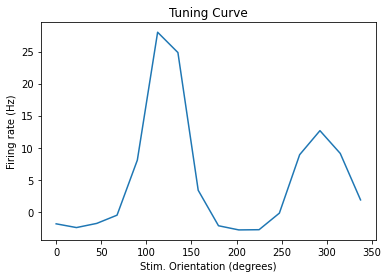

In [ ]:
# you'll need to average over trials and firings over stimulus time
# don't forget to convert time to seconds so rates come out in Hz.

angles = np.arange(0,337.6,22.5)    # given to us
spikes = data['spikes']
num_stim = 16   #number of unique stimuli
num_trials = 30
avg_frs = []

# calculate the rates for when the stimulus is on as a function of the angles
# and plot rates bs angles. For the rates you need to include only the first 16 ones,
# we don't care about the background.

for stim in range(num_stim): 
  fr = 0
  stimulus = np.transpose(spikes[stim])
  for trial in range(num_trials): 
    trial_s = stimulus[trial,:]  
    fr += sum(trial_s[500:2500])/2  #get firing rate divided by 2 seconds
  fr = fr/num_trials - 3.175
  avg_frs.append(fr)


fig4, ax4 = plt.subplots();
ax4.plot(angles, avg_frs)
ax4.set(xlabel='Stim. Orientation (degrees)', ylabel='Firing rate (Hz)', title
='Tuning Curve');
plt.show()

#Problem 2: Estimation of spectro-temporal receptive fields (STRF) with spike-triggered averaging (STA)



In this exercise, we will demonstrate how to estimate the **spectro-temporal receptive field** (STRF) using **spike-triggered averaging** (STA) for a synthetic example. This will provide us an opportunity to review the **linear nonlinear model**. In this model, the linear response is given by a filter/kernel (the receptive field) acting on the stimulus. This provides a linear estimate of the firing rate of the neuron. This firing rate is then passed through a thresholding nonlinear function to prevent negative firing rates. Finally, this rate is used to generate spikes. This exercise focuses on building all the components of this model and generate a synthetic spike train. Then, we will use the generated spike train to recover the neuron’s receptive field by applying spike triggered averaging.



The steps in this process are:




1.   Generate a synthetic stimulus ( Use generate_stimulus() function given below)
2.   Generate a kernel to mimic an STRF (Use generate_kernel() given below).
3. Compute the synthetic cell response by filtering the stimulus with the kernel.
4. Feed the cell response to a thresholding non-linearity and generate spikes. Note that whenever the stimulus is sufficiently correlated with the kernel, the neuron will fire.
5. Use this spike train to compute the STA (the average stimulus that precedes a spike).
6. Compare the kernel recovered by STA with the original one.
7. Comment on the limitations that prevent us from perfectly estimating the STRF.

.


We begin by constructing a stimulus to present to the neuron. We know the neuron is selective to time-varying sound, but we want to know which sound best excites the neuron. Therefore, we want a stimulus that will try many different sequences of sounds with equal probability. The function generate_stimulus generates such a stimulus in the form of a 2D matrix where the rows represent 50 logarithmically spaced tone frequencies and the columns represent time bins of width 1ms. Thus, the entry (i, j) of the matrix is the amplitude of tone i at time step j. The stimulus is constructed so that tones turn on and last for 30ms, with a slight ramping at the onset and offset to make transition sound transitions less abrupt. Each tone has a 10% probability of turning on in a given 30ms window.

.

To see how this works, call the function generate_stimulus to construct the stimulus matrix. The code will also plot the stimulus matrix. Note that this is an auditory stimulus – it’s plotted by showing power levels (color) at different frequencies (y-axis) and times (x-axis).

.



The next step is to construct an STRF. To carry this operation, we have provided you with the function generate_kernel. This script returns an array of 100 time bins by 50 frequency bins, containing the STRF. The STRF is constructed by summing up different bivariate Gaussian distributions.
Call generate_kernel to construct the STRF. The code will plot the stimulus matrix. Notice that the kernel matrix has already been flipped in time. This is the stimulus that best excites our model neuron.

.


Now that we have a stimulus matrix and a kernel, we are ready to simulate how the neuron responds to the stimulus. To do this, you will slide the kernel across the stimulus, and at each time step calculate the integral (sum) of the element-wise product between the kernel and the stimulus. This is our estimate of how strongly the neuron is excited by the stimulus at each time. Our simulated neuron should spike whenever this excitatory drive exceeds some threshold.










In [ ]:

    
def generate_stimulus():
    # generates stimulus - plotting with jupyter notebook is a nightmare
    # provide a MATLAB pic for comparison


    m = 50
    freq = np.logspace(2, 4, m)           # log-spaced freqs from 100 to 10000
    dt = .001                     # dt that stim matrix is sampled at, in s
    t_dur = 1000                  # stim length in seconds
    #stimulus = np.empty([m,int(t_dur/dt)],dtype='float32') # Colab issues
    stimulus = np.zeros([m,int(t_dur/dt)])

    # cosine ramping   from zero to one ---- and ramping down to zero, Dt = 5
    t = np.arange(0, .05, .01)
    y = 1 - np.cos(2*5*t*math.pi)**2
    filler = np.ones(30)
    filler[0:5] = y
    filler[-5:] = np.flip(y)

    #start random number generator
    #np.random.seed()
    rng = np.random.default_rng(seed=940)  # Create a default Generator.
    for idx in np.arange(0, t_dur/.03):
        #prob = np.argwhere(np.random.uniform(size=m) > 0.9)
        prob = np.argwhere(rng.uniform(size=m) >= 0.9)  
        ton_d = math.ceil(.03/dt)
        for k in range(prob.size):
            x_loc = int(prob[k])
            y_loc = np.arange(int((idx-1)*ton_d),int((idx*ton_d)))
            stimulus[x_loc, y_loc] = filler


    figS, axS = plt.subplots()

    axS.imshow(stimulus);
    axS.set(xlabel='time (ms)', ylabel='Frequency Bands')

    ratio = 1
    xleft, xright = axS.get_xlim()
    ybottom, ytop = axS.get_ylim()
    axS.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)
    
    return stimulus
    
    
    
def generate_kernel():
    dt = 0.001                      #  timesteps
    m = 50                          # num freqs
    dur_k = .10                     # kernel duration in seconds 100 msec

    #means
    mu1 = np.array([dur_k/2/dt, 10])
    mu2 = np.array([dur_k/2/dt+1, 40])
    mu3 = np.array([dur_k/2/dt+1, 10])
    mu4 = np.array([dur_k/2/dt, 40])

    #cov matrix
    theta = 0
    R = np.array([(math.cos(theta), math.sin(-theta)),
                 (math.sin(theta), math.cos(theta))])

    Sigma = 20*np.linalg.inv(R)*np.array([(40, 0), (0, 1)])*R
    x1 = np.arange(int(1), int(dur_k/dt + 1))
    x2 = np.arange(int(1), int(m+1))

    # generates kernel
    (X1,X2) = np.meshgrid(x1,x2)

    pos = np.dstack((X1, X2))

    mv1 = multivariate_normal(mu1, Sigma)
    mv2 = multivariate_normal(mu2, Sigma)
    mv3 = multivariate_normal(mu3, Sigma)
    mv4 = multivariate_normal(mu4, Sigma)

    figS = plt.figure()
    axS = figS.add_subplot(111);

    F = mv1.pdf(pos) + mv2.pdf(pos) - mv3.pdf(pos) - mv4.pdf(pos)

    norm = cm.colors.Normalize(vmax=abs(F).max(), vmin=-abs(F).max())
    cmap = cm.gray

    cset1 = axS.contourf(X1, X2, F, norm=norm,
                         cmap=cm.get_cmap(cmap));

    figS.colorbar(cset1);
    axS.set(xlabel='Time before spike (ms)', ylabel='Frequency')

    return F

## 2.1

Look at the plot produced by generate_kernel(). Is this receptive field separable? Briefly explain why or why not.


**ANSWER:**
The receptive field is separable because it is symmetric accross both axes. The sections in the top left and bottom right can be separated from the top right and bottom left sections. The time and frequency can be separated.





<ipython-input-13-16159e19cd4e>:86: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap(cmap));


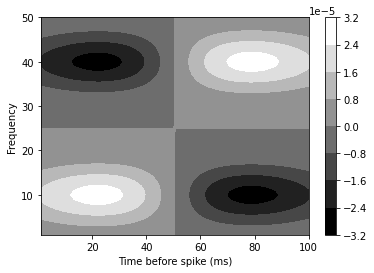

In [ ]:
kernel = generate_kernel()   # this will do it

##2.2

a.) Generate the stimulus to plot it. Use the function provided to you.

.


b.) Write code to calculate the excitatory drive to the neuron at each time in the stimulus. You can start 100ms into the stimulus (the STRF is $100ms$ long). Plot a histogram of the excitatory drive.

**Answer**


.



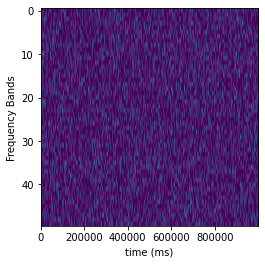

In [ ]:
# generate the stimulus. Use the generate_stimulus() function
# In case, you are not able to get a good quality picture check the picture 
# in Canvas in the same folder where you got this file.
# you may try various aspect ratios, but don't spend too much time on it.

# Understand how the stimulus is being generated.

# plot the stimulus:
# add your 1 line of code here (If it is difficult to see the output check out the image raster.png)

stimulus = generate_stimulus()



In [ ]:
# calculate the spike train 

dt = 0.001    # timesteps (check functions)
t_dur = 1000     #  in sec
Rate = np.zeros(int(t_dur/dt))
spike_train = np.zeros(int(t_dur/dt))
time_arr = np.array([i for i in range(1000000)])


x = stimulus.shape       # 1000 sec
y = kernel.shape          #  100 msec



# add your code here to calculate the Rate[] data. Remember Rate is the output.

time = int(t_dur/dt)
for i in range(time):
  if i > 100:
    Rate[i] = np.sum(stimulus[:, i-99:i+1] * kernel)







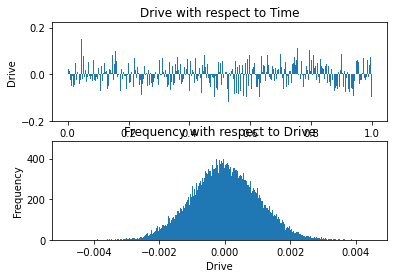

In [ ]:
# histogram for Rate ax.hist(), choose the number of bins appropriately.
fig12, ax12 = plt.subplots(2, 1)
ax12[0].hist(time_arr, bins=10000, weights=Rate)
ax12[0].set(ylabel = 'Drive', xlabel = 'Time(ms)')
ax12[0].set(title = 'Drive with respect to Time')
ax12[1].hist(Rate, bins=10000)
ax12[1].set(ylabel = 'Frequency', xlabel = 'Drive')
ax12[1].set(title = 'Frequency with respect to Drive')
plt.show()



##2.3

Write code to record a spike whenever the excitatory drive to the neuron exceeds a threshold. Choose a threshold such that the neuron spikes **approximately** 1,500 times over the entire stimulus presentation. To determine the threshold value, it will be useful to look at the previous histogram.




In [ ]:
# look at the distribution and try different values of alpha (see below) 
# to find out which threshold gives you approximately 1500 spikes 
# (You may find a conditional statement on Rate using np.argwhere helpful)

# enter your code here

alpha = [2.98, 2.99, 3.00, 3.01, 3.02]   
          # try different alpha's  
for al in alpha:
  threshold = np.mean(Rate) + al*np.std(Rate)
  print(f'The alpha value {al} has {np.sum(np.where(Rate>threshold, 1, 0))} spikes.')

print('Alpha = 3.01 gives us a neuron spiking of approximately 1500 times over the stimulus')
chosen_threshold = np.mean(Rate) + 3.01*np.std(Rate)
print(f'The chosen threshold is {chosen_threshold}')





The alpha value 2.98 has 1669 spikes.
The alpha value 2.99 has 1608 spikes.
The alpha value 3.0 has 1552 spikes.
The alpha value 3.01 has 1507 spikes.
The alpha value 3.02 has 1462 spikes.
Alpha = 3.01 gives us a neuron spiking of approximately 1500 times over the stimulus
The chosen threshold is 0.003066439772067585


##2.4

Make a figure with the following three subplots: 



1.   $100$ milliseconds of the stimulus (use ‘matplotlib.pyplot.imshow’)
2.   the excitatory drive to the neuron during this part of the stimulus (include a constant dashed line for the threshold)

1.  the spiking response of the neuron to this part of the stimulus.






Spike at 9480
range: 9430 to 9530


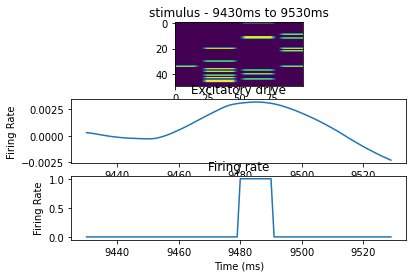

<Figure size 432x288 with 0 Axes>

In [ ]:
time_data = np.arange(dt, t_dur+dt, dt)
spike_train = np.where(Rate>chosen_threshold, 1, 0)

for i, spike in enumerate(spike_train): 
  if spike == 1:
    print(f'Spike at {i}')
    spike1 = i
    break

range1 = spike1 - 50
range2 = spike1 + 50
print(f'range: {range1} to {range2}')
range_tot = [i for i in range(range1, range2)]

fig13, ax13 = plt.subplots(3,1)
ax13[0].imshow(stimulus[:, range1:range2])
ax13[0].set(title='stimulus - 9430ms to 9530ms', xlabel='time (ms)')

ax13[1].plot(time_arr[range1:range2], Rate[range1:range2])
# ax13[1].plot(range, [chosen_threshold for _ in range(range)])
ax13[1].set(title='Excitatory drive', xlabel='Time (ms)', ylabel='Firing Rate')

ax13[2].plot(time_arr[range1:range2], spike_train[range1:range2])
ax13[2].set(title='Firing rate', xlabel='Time (ms)', ylabel='Firing Rate') 

plt.show()


plt.tight_layout()

##2.5

Now you are ready to compute the STA from the spike train. Write code to calculate the average $150ms$ of stimulus that precedes each spike. Plot the recovered STA using **‘ax.imshow’** and include a colorbar(see generate_kernel for an example of how to plot with a colorbar).

In [ ]:
m = 50 # number of frequencies
dur_k = .1 # duration of kernel in seconds

size_sta_1 = int(dur_k/dt)
size_sta_2 = int(.05/dt)

sta = np.zeros((m, size_sta_1+size_sta_2))
n_spikes = np.sum(spike_train)



# add your code here for sta:
for i, spike in enumerate(spike_train):
  if spike:
    sta += stimulus[:, i-150:i]
sta = sta/n_spikes


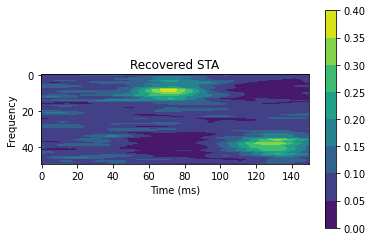

In [ ]:
fig15, ax15 = plt.subplots()

plt.imshow(sta)
plt.title('Recovered STA')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency')
fig15.colorbar(ax15.contourf(sta))
plt.show()





##2.6

The kernel is $100ms$ long, and we computed a STA that is $150ms$ long. What do you notice in the part of the STA corresponding to $150-100ms$ prior to a spike?

**Answer:**

I notice that this particular time period prior to the spike is noise that does not affect the system. This makes sense because there is no spike during this time period nor does it affect the spiking period.

##2.7

How well did the STA recover the neuron’s receptive field? What parts of the kernel did the STA fail to recover? Why do you think this is? Think of the number of spikes, the type of stimulus needed to perform this analysis, and the baseline firing rate of the neuron.


**Answer:**

The STA recovered important parts of the neuron's receptive field but could be improved. There is lots of noise that can be reduced by lowering the number of spikes because a higher threshold is indicative of a stimulus that resembles the kernel more closely. In addition, random noise may lead to more spike triggering events that are less reliable. In this case, it would be unlikely that a stimulus input would resemble the kernel well.